# Eye of the Emergency

## Libraries and dataset import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train_tweets.csv')
test_df = pd.read_csv('test_tweets.csv')

## Data Exploration

### Train Data Exploration

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Peu de colonnes, beaucoup de NaN dans keyword et location.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train_df.text.size

7613

In [7]:
train_df.text.unique().size

7503

7613 tweets dont 7503 uniques

#### Décompte des tweets doublons

In [8]:
unique_count = pd.DataFrame(pd.value_counts(train_df.text))
unique_count = unique_count.reset_index()
unique_count.columns = ['text', 'count']

In [9]:
unique_count.head()

,text,count
0,11-Year-Old Boy Charged With Manslaughter of T...,10
1,He came to a land which was engulfed in tribal...,6
2,The Prophet (peace be upon him) said 'Save you...,6
3,#Bestnaijamade: 16yr old PKK suicide bomber wh...,6
4,Madhya Pradesh Train Derailment: Village Youth...,5


In [10]:
train_df_unique = pd.DataFrame(train_df.text.unique(), columns = ['text'])
train_df_unique.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [11]:
train_df_unique = train_df_unique.merge(unique_count)
train_df_unique.head()

,text,count
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
train_df_count = train_df.merge(unique_count)

In [13]:
train_df_count.shape[0]

7613

In [14]:
#train_df_count['count'].sum()

In [15]:
train_df_count.head()

,id,keyword,location,text,target,count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1


#### Vérification si les tweets en doublons sont tous du même target

In [16]:
target_count = [train_df_count[train_df_count.text == train_df_count.iloc[i].text].target.sum() for i in range(train_df_count.shape[0])]


In [17]:
target_count

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,


In [18]:
len(target_count)

7613

In [19]:
sum(target_count)

3562

In [20]:
neux = pd.concat([train_df_count, pd.DataFrame(target_count)], axis=1)
neux[neux.count == 1]

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: 0, Length: 7613, dtype: int64

### Longueur des tweets

In [21]:
lg = pd.DataFrame([len(txt) for txt in train_df.text], columns = ['len_text'])
lg.head()

,len_text
0,69
1,38
2,133
3,65
4,88


In [22]:
train_df_len = pd.concat([train_df_count, lg], axis = 1)
train_df_len.head()

,id,keyword,location,text,target,count,len_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88


In [23]:
df = train_df_len

In [24]:
round(df.len_text.mean(), 1)

101.0

In [25]:
round(df[df.target == 0].len_text.mean(), 1)

97.6

In [26]:
round(df[df.target == 1].len_text.mean(), 1)

105.6

### Test Data Exploration

In [27]:
#test_df.head()

In [28]:
#test_df.info()

In [29]:
#test_df.isnull().sum()

## Data Preprocess

### Location Encoder

In [30]:
encode_location = pd.DataFrame([int(type(ct)==str) for ct in df.location], columns=['location_enc'])

In [31]:
df = pd.concat([df, encode_location], axis=1)
df.head()

,id,keyword,location,text,target,count,len_text,location_enc
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88,0


## Data Visualization

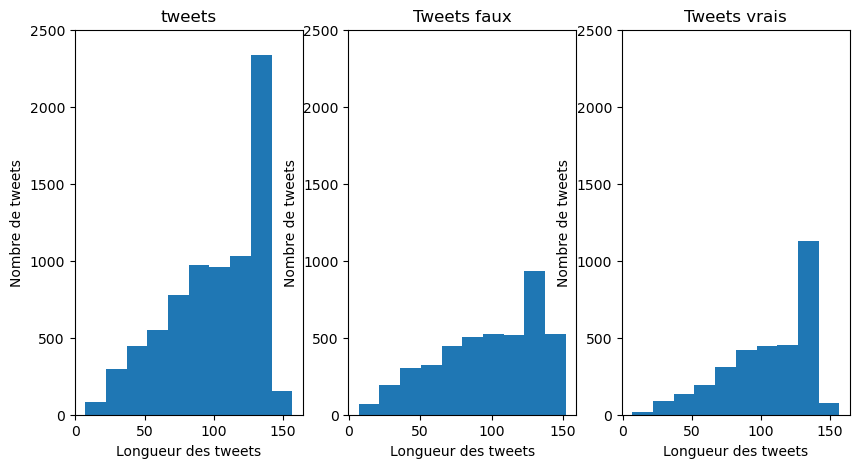

In [32]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)

plt.hist(df.len_text)
plt.title('tweets')
plt.xlabel('Longueur des tweets')
plt.ylabel('Nombre de tweets')
plt.ylim((0,2500))

plt.subplot(1, 3, 2)

plt.hist(df[df.target==0].len_text)
plt.title('Tweets faux')
plt.xlabel('Longueur des tweets')
plt.ylabel('Nombre de tweets')
plt.ylim((0,2500))


plt.subplot(1, 3, 3)

plt.hist(df[df.target==1].len_text)
plt.title('Tweets vrais')
plt.xlabel('Longueur des tweets')
plt.ylabel('Nombre de tweets')
plt.ylim((0,2500))

plt.show()

In [33]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f} %\n({v:d})'.format(p=pct,v=val)
    return my_autopct

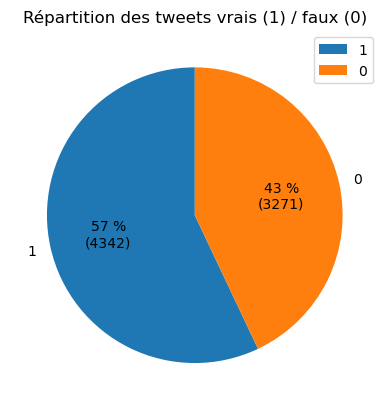

In [34]:
plt.pie(pd.value_counts(df.target), labels = df.target.unique(), autopct=make_autopct(pd.value_counts(df.target)), startangle = 90)

plt.title('Répartition des tweets vrais (1) / faux (0)')
plt.legend()

plt.show()

In [35]:
import numpy as np
from PIL import Image

In [36]:
from wordcloud import WordCloud

In [37]:
stopwords = pd.read_csv('stopwords.txt', header = None)
stopwords.columns=['words']

In [38]:
stopwords = [wrd for wrd in stopwords.words]

In [39]:
stopwords.append('http')
stopwords.append('https')
stopwords.append('Û_')
stopwords.append('amp')

In [40]:
text = [txt for txt in df.text]
#text

In [41]:
my_lst_str = ' '.join(map(str, text))
#my_lst_str

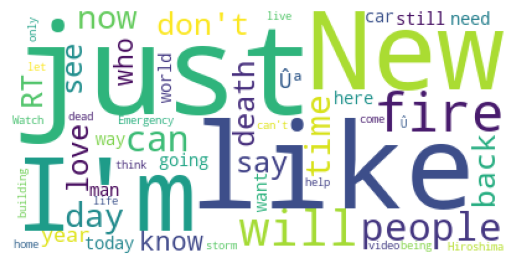

In [42]:
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords , max_words = 50).generate(my_lst_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
text_0 = [txt for txt in df.text[df.target == 0]]
text_1 = [txt for txt in df.text[df.target == 1]]

In [44]:
my_lst_str_0 = ' '.join(map(str, text_0))
my_lst_str_1 = ' '.join(map(str, text_1))

In [45]:
#my_lst_str_0
#my_lst_str_1

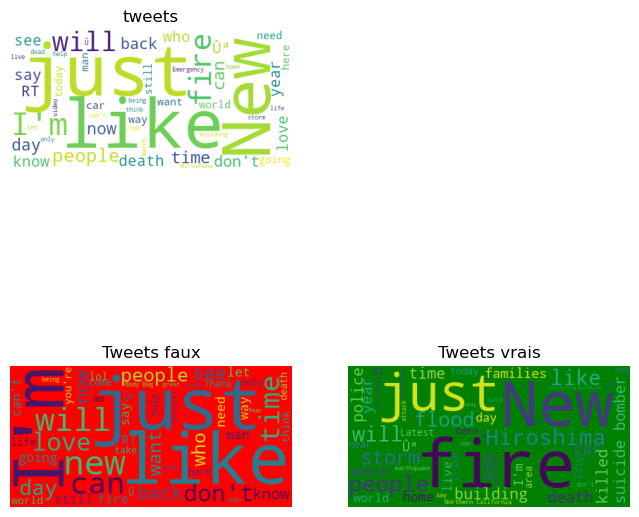

In [46]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords , max_words = 50).generate(my_lst_str)
plt.imshow(wordcloud)

plt.title('tweets')
plt.axis("off")

plt.subplot(2, 2, 3)

wordcloud_0 = WordCloud(background_color = 'red', stopwords = stopwords , max_words = 50).generate(my_lst_str_0)
plt.imshow(wordcloud_0)

plt.title('Tweets faux')
plt.axis("off")


plt.subplot(2, 2, 4)

wordcloud_1 = WordCloud(background_color = 'green', stopwords = stopwords , max_words = 50).generate(my_lst_str_1)
plt.imshow(wordcloud_1)

plt.title('Tweets vrais')
plt.axis("off")

plt.show()

In [47]:
#pip install wordcloud

## ML : SVM avec sklearn

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

from sklearn.svm import SVC

In [49]:
iris  = load_iris()
#iris.data
#iris.target_names
#iris.feature_names

In [50]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [51]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
a = iris_df.loc[:,'petal length (cm)']
b = iris_df.loc[:,'petal width (cm)']

In [53]:
x = list(zip(a, b))
y = iris.target

In [54]:
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [55]:
#instanciation
model_SVC = SVC(kernel = 'linear', gamma = 'scale', shrinking = False)

In [56]:
#training
model_SVC.fit(x_train, y_train)

SVC(kernel='linear', shrinking=False)

In [57]:
#calcul de la précision
model_SVC.score(x_test, y_test)

0.9333333333333333

In [58]:
#Prédiction
longueur = 2.5
largeur = 0.75
prediction = model_SVC.predict([[longueur, largeur]])

In [59]:
#affichage des résultats
resultat = "Résultat : "
if prediction[0] == 0:
    resultat = resultat + "setosa"
if prediction[0] == 1:
    resultat = resultat + "versicolor"
if prediction[0] == 2:
    resultat = resultat + "virginica"

In [60]:
resultat

'Résultat : setosa'

In [ ]:
[list for list in df.text_tokens]